In [2]:
import numpy as np
import matplotlib.pyplot as plt

#for 3d printing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#displaying plot in loop
from IPython import display
import time

In [3]:
def dist(x,y,z):
    return np.sqrt(x**2+y**2+z**2)

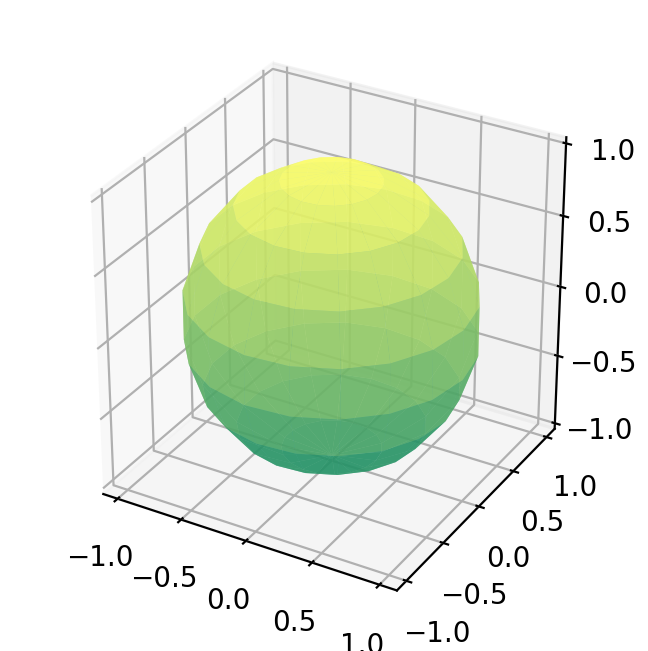

In [4]:
'''copied online resource code to draw sphere'''
resCircle = 10
uCircle = np.linspace(0, 2*np.pi, resCircle*2) # phi
vCircle = np.linspace(0, np.pi, resCircle) # theta
xCircle = np.outer(np.cos(uCircle), np.sin(vCircle))
yCircle = np.outer(np.sin(uCircle), np.sin(vCircle))
zCircle = np.outer(np.ones(np.size(uCircle)), np.cos(vCircle))
rCircle = 1
fig = plt.figure(dpi=200)
ax = fig.gca(projection='3d')
ax.set_aspect('equal')
def circle(x,y,z,cmap):
    global uCircle,vCircle,xCircle,yCircle,zCircle,rCircle
    ax.plot_surface(
        rCircle*xCircle + x, rCircle*yCircle + y, rCircle*zCircle + z,
#         color='#1f77b4',
        cmap=cmap,
        alpha=0.7,
        linewidth=0
        )
circle(0,0,0,'summer')

In [5]:
def randomStart(l):
    '''starts particle in random point on surface of a cube center around the origin'''
    rw = np.random.random(); 
    if rw >= 0 and rw <.166:
        '''chooses top face'''
        x  = np.random.randint(-l,l)
        y  = np.random.randint(-l,l)
        z = l

    elif rw >=.166  and rw < .333:
        '''chooses bottom face'''
        x  = np.random.randint(-l,l)
        y  = np.random.randint(-l,l)
        z = -l
    elif rw>=.333 and rw < .5:
        '''chooses right face'''
        x  = np.random.randint(-l,l)
        z  = np.random.randint(-l,l)
        y  = l
    elif rw>=.5 and rw <.666:
        '''chooses left face'''
        x  = np.random.randint(-l,l)
        z  = np.random.randint(-l,l)
        y = -l
    elif rw>=.666 and rw < .833:
        '''chooses front face'''
        z  = np.random.randint(-l,l)
        y  = np.random.randint(-l,l)
        x = l
    elif rw>=.833 and rw <1.0:
        '''chooses back face'''
        z  = np.random.randint(-l,l)
        y  = np.random.randint(-l,l)
        x = -l    
    
    return x,y,z

In [6]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title='Final_Projectv1', artist='Ruben Santana',comment='v1')
writer = FFMpegWriter(fps=30, metadata=metadata,bitrate=350000)

In [ ]:
fig.clear()
with writer.saving(fig, "animation14.mp4", dpi=100):

    ax = fig.gca(projection='3d')
    rotate = 0 #rotating counter

    '''initial sticky particle'''
    vector = np.array([[0],[0],[0]]) #initial position
    circle(vector[0],vector[1],vector[2],'Reds') #plots initial circle


    '''starting position of new particle'''
    rStart = 8 #starting length of box from origin to face
    nParticles = 600 # number of particles looking using
    for p in range(0,nParticles):
        box = round(np.sqrt(rStart)) #imaginary box which contains particles
        x,y,z = randomStart(box)
        stick = False #condition for new particle to enter 
        if p%5 ==0:
            '''prints progress'''
            print (x,y,z,'particle: ',p,'box: ',box)
        while stick == False:
            '''saving position'''
            xOrg = x
            yOrg = y
            zOrg = z       

            '''random walk'''
            rw = np.random.random(); 
            if rw >= 0 and rw <.166:
                '''moves up on x axis'''
                x = x + 1
            elif rw >=.166  and rw < .333:
                '''moves down on x axis'''
                x = x - 1
            elif rw>=.333 and rw < .5:
                '''moves up on yaxis'''
                y = y + 1
            elif rw>=.5 and rw <.666:
                '''moves down on y axis'''
                y = y - 1
            elif rw>=.666 and rw < .833:
                '''moves up on z axis'''
                z = z + 1
            elif rw>=.833 and rw <1.0:
                '''moves down on z axis'''
                z = z - 1

            if dist(x,y,z) > box*1.9:
                '''if particles moves outside of "box" reset it to previous position'''
                x = xOrg
                y = yOrg
                z = zOrg

            for i in range (1,len(vector[0])+1):
                '''checking for neighboring particles'''
                xDist = x - vector[0][-i]
                yDist = y - vector[1][-i]        
                zDist = z - vector[2][-i]   
                Dist = dist(xDist,yDist,zDist)
                if Dist < 1.5 and Dist > .5:
                    '''looking for neighbor'''
                    '''appends particle to structure'''
                    vector = np.append(vector,[[x],[y],[z]],axis=1)
                    rStart +=1 #increases box size
                    stick = True # ends random walk loop
                    break #breaks neighbor finding loop

        '''plots new particle to structure'''
        circle(x,y,z,'copper')
        ax.grid(False)

        ax.set_axis_off()
        if box < 20:
            '''zoom out in the beginning'''
            ax.set_xlim(-box, box)
            ax.set_ylim(-box, box)
            ax.set_zlim(-box, box)
        else:
            '''freezes zoom'''
            ax.set_xlim(-25, 25)
            ax.set_ylim(-25, 25)
            ax.set_zlim(-25, 25)
        if p%5 ==0:
            '''saves frame for every 3rd particle'''
            ax.view_init(30, 50+rotate*2)
            rotate +=1
            writer.grab_frame()
            time.sleep(0.1)

    for j in range(90):
        '''final 360 around structure'''
        if j%5 ==0:
            print (j*4)
        ax.view_init(30, 50+rotate*2)
        rotate +=2
        writer.grab_frame()
        time.sleep(0.1)

## Particles in Stream

In [ ]:
fig.clear()
with writer.saving(fig, "animation15.mp4", dpi=100):

    ax = fig.gca(projection='3d')
    rotate = 0 #rotating counter

    '''initial sticky particle'''
    vector = np.array([[0],[0],[0]]) #initial position
    circle(vector[0],vector[1],vector[2],'Greens') #plots initial circle


    '''starting position of new particle'''
    rStart = 8 #starting length of box from origin to face
    nParticles = 1000 # number of particles looking using
    for p in range(0,nParticles):
        box = round(np.sqrt(rStart)) #imaginary box which contains particles
        x,y,z = randomStart(box)
        stick = False #condition for new particle to enter 
        if p%5 ==0:
            '''prints progress'''
            print (x,y,z,'particle: ',p,'box: ',box)
        while stick == False:
            '''saving position'''
            xOrg = x
            yOrg = y
            zOrg = z       

            '''random walk'''
            rw = np.random.random(); 
            if rw >= 0 and rw <.3:
                '''moves up on x axis'''
                x = x + 1
            elif rw >=.3  and rw < .35:
                '''moves down on x axis'''
                x = x - 1
            elif rw>=.35 and rw < .65:
                '''moves up on yaxis'''
                y = y + 1
            elif rw>=.65 and rw <.70:
                '''moves down on y axis'''
                y = y - 1
            elif rw>=.70 and rw < .95:
                '''moves up on z axis'''
                z = z + 1
            elif rw>=.95 and rw <1.0:
                '''moves down on z axis'''
                z = z - 1

            if dist(x,y,z) > box*1.9:
                '''if particles moves outside of "box" reset it to previous position'''
                x = xOrg
                y = yOrg
                z = zOrg

            for i in range (1,len(vector[0])+1):
                '''checking for neighboring particles'''
                xDist = x - vector[0][-i]
                yDist = y - vector[1][-i]        
                zDist = z - vector[2][-i]   
                Dist = dist(xDist,yDist,zDist)
                if Dist < 1.5 and Dist > .5:
                    '''looking for neighbor'''
                    '''appends particle to structure'''
                    vector = np.append(vector,[[x],[y],[z]],axis=1)
                    rStart +=1 #increases box size
                    stick = True # ends random walk loop
                    break #breaks neighbor finding loop

        '''plots new particle to structure'''
        circle(x,y,z,'Reds')
        ax.grid(False)

        ax.set_axis_off()
        if box < 30:
            '''zoom out in the beginning'''
            ax.set_xlim(-box, box)
            ax.set_ylim(-box, box)
            ax.set_zlim(-box, box)
        else:
            '''freezes zoom'''
            ax.set_xlim(-30, 30)
            ax.set_ylim(-30, 30)
            ax.set_zlim(-30, 30)
        if p%5 ==0:
            '''saves frame for every 3rd particle'''
            ax.view_init(30, 50+rotate*2)
            rotate +=1
            writer.grab_frame()
            time.sleep(0.1)

    for j in range(90):
        '''final 360 around structure'''
        if j%5 ==0:
            print (j*4)
        ax.view_init(30, 50+rotate*2)
        rotate +=2
        writer.grab_frame()
        time.sleep(0.1)

## 2 Particles

In [38]:
fig.clear()
startTime = time.time()
with writer.saving(fig, "animation21.mp4", dpi=200):

    ax = fig.gca(projection='3d')
    rotate = 0 #rotating counter

    '''initial sticky particle'''
    vector1 = np.array([[0],[0],[-6]]) #initial position
    vector2 = np.array([[0],[0],[6]]) #initial position
    circle(vector1[0],vector1[1],vector1[2],'Reds') #plots initial circle
    circle(vector2[0],vector2[1],vector2[2],'Blues') #plots initial circle

    
    '''Initial conditions'''
    partType = 1 # starting particle
    overlapping = 0 #condition check

    '''starting position of new particle'''
    rStart = 8 #starting length of box from origin to face
    nParticles = 1000 # number of particles looking using
    for p in range(0,nParticles):
        box = round(np.sqrt(rStart)) #imaginary box which contains particles
        x,y,z = randomStart(box)
        stick = False #condition for new particle to enter 
        if p%5 ==0:
            '''prints progress'''
            print (x,y,z,'particle: ',p,'box: ',box)
        while stick == False:
            '''saving position'''
            xOrg = x
            yOrg = y
            zOrg = z       

            '''random walk'''
            rw = np.random.random(); 
            if rw >= 0 and rw <.166:
                '''moves up on x axis'''
                x = x + 1
            elif rw >=.166  and rw < .333:
                '''moves down on x axis'''
                x = x - 1
            elif rw>=.333 and rw < .5:
                '''moves up on yaxis'''
                y = y + 1
            elif rw>=.5 and rw <.666:
                '''moves down on y axis'''
                y = y - 1
            elif rw>=.666 and rw < .833:
                '''moves up on z axis'''
                z = z + 1
            elif rw>=.833 and rw <1.0:
                '''moves down on z axis'''
                z = z - 1

            if dist(x,y,z) > box*1.9:
                '''if particles moves outside of "box" reset it to previous position'''
                x = xOrg
                y = yOrg
                z = zOrg

            for i in range (1,len(vector1[0])+1):
                '''checking for neighboring particles'''
                xDist = x - vector1[0][-i]
                yDist = y - vector1[1][-i]        
                zDist = z - vector1[2][-i]   
                Dist = dist(xDist,yDist,zDist)
                if Dist < .5:
                    '''particle overlapping'''
                    overlapping = 1
                    break
                if Dist < 1.5 and Dist > .5:
                    '''looking for neighbor'''
                    stickChange = np.random.random(); #probability of sticking
                    if partType == 1:
                        '''first particle'''
                        if stickChange <= .99:
                            vector1 = np.append(vector1,[[x],[y],[z]],axis=1)
                            rStart +=1 #increases box size
                            stick = True # ends random walk loop
                            break #breaks neighbor finding loop
                    if partType == 2:
                        '''second particle'''
                        if stickChange > .99:
                            vector2 = np.append(vector2,[[x],[y],[z]],axis=1)
                            rStart +=1 #increases box size
                            stick = True # ends random walk loop
                            break #breaks neighbor finding loop
                    
                    
                    
            for i in range (1,len(vector2[0])+1):
                '''checking for neighboring particles'''
                xDist = x - vector2[0][-i]
                yDist = y - vector2[1][-i]        
                zDist = z - vector2[2][-i]   
                Dist = dist(xDist,yDist,zDist)
                
                if Dist < .5:
                    '''particle overlapping'''
                    overlapping = 1
                    break
                if Dist < 1.5 and Dist > .5:
                    '''looking for neighbor'''
                    stickChange = np.random.random(); #probability of sticking
                    if partType == 1:
                        '''first particle'''
                        if stickChange > .99:
                            vector1 = np.append(vector1,[[x],[y],[z]],axis=1)
                            rStart +=1 #increases box size
                            stick = True # ends random walk loop
                            break #breaks neighbor finding loop
                    if partType == 2:
                        '''second particle'''
                        if stickChange <= .99:
                            vector2 = np.append(vector2,[[x],[y],[z]],axis=1)
                            rStart +=1 #increases box size
                            stick = True # ends random walk loop
                            break #breaks neighbor finding loop
                            
            if overlapping == 1:
                '''prevents multiple particles in same place'''
                stick = False
                overlapping = 0 

        '''plots new particle to structure'''
        if partType == 1:
            circle(x,y,z,'autumn')
        elif partType == 2:
            circle(x,y,z,'summer')
        
        if partType == 1:
            '''switches particle'''
            partType = 2
            
        elif partType == 2:
            partType = 1

        ax.grid(False)
        ax.set_axis_off()
        if box < 20:
            '''zoom out in the beginning'''
            ax.set_xlim(-box, box)
            ax.set_ylim(-box, box)
            ax.set_zlim(-box, box)
        else:
            '''freezes zoom'''
            ax.set_xlim(-20, 20)
            ax.set_ylim(-20, 20)
            ax.set_zlim(-20, 20)
        if p%5 ==0:
            '''saves frame for every 3rd particle'''
            ax.view_init(30, 50+rotate*2)
            rotate +=1
            writer.grab_frame()
            time.sleep(0.1)
        
        if time.time() - startTime > 60*150:
            '''time limit'''
            print('150min Passed')
            break
        

    for j in range(90):
        '''final 360 around structure'''
        if j%5 ==0:
            print (j)
        ax.view_init(30, 50+rotate*2)
        writer.grab_frame()
        rotate +=2
        time.sleep(0.1)

-3 -2 3.0 particle:  0 box:  3.0
-4.0 3 3 particle:  5 box:  4.0
4.0 1 0 particle:  10 box:  4.0
4 5.0 -1 particle:  15 box:  5.0
-3 1 6.0 particle:  20 box:  6.0
6.0 -4 2 particle:  25 box:  6.0
3 -6.0 -5 particle:  30 box:  6.0
7.0 -7 5 particle:  35 box:  7.0
7.0 -1 -3 particle:  40 box:  7.0
-8 -4 -8.0 particle:  45 box:  8.0
-8.0 -2 -6 particle:  50 box:  8.0
-8.0 -8 -1 particle:  55 box:  8.0
-7 -8.0 7 particle:  60 box:  8.0
-9.0 2 -7 particle:  65 box:  9.0
-4 -1 -9.0 particle:  70 box:  9.0
-9.0 8 0 particle:  75 box:  9.0
-1 5 10.0 particle:  80 box:  10.0
-2 10.0 -10 particle:  85 box:  10.0
10.0 1 -6 particle:  90 box:  10.0
2 4 10.0 particle:  95 box:  10.0
11.0 -9 -9 particle:  100 box:  11.0
-2 0 11.0 particle:  105 box:  11.0
-11.0 10 0 particle:  110 box:  11.0
11.0 -2 5 particle:  115 box:  11.0
7 12.0 -5 particle:  120 box:  12.0
7 -8 12.0 particle:  125 box:  12.0
-6 -3 -12.0 particle:  130 box:  12.0
-11 -12.0 -7 particle:  135 box:  12.0
-7 12.0 8 particle:  140 b